# folding potential上を動く2Dブラウン運動

## Protein-folding 
タンパク質が特定の立体構造に折りたたまれる現象

ここでは$x\in\mathrm{R}^2$とし, $r=|x|$とする.
系の従うポテンシャルを
$$
    U(r)=
        \begin{cases}
        -2.5(r-3)^2\quad r<3\\
        0.5(r-3)^3-(r-3)^2\quad r\geq3
        \end{cases}
$$
と仮定する.

In [1]:
!python ./make_dataset/brown_model/make_data_brown.py

[[ 0.659814   -0.12411978]
 [-0.45215468  0.248033  ]
 [ 0.87583337 -0.35884691]
 ...
 [-0.36388923 -0.47085909]
 [ 1.07543582  0.14048146]
 [ 1.15950176  0.5042985 ]]
(1000001, 2)
(1000, 1000, 2)


In [2]:
!mv folding_2d_traj.npy ./sample_br2d/dataset/folding_2d_traj.npy

folding_energy.pngを表示. 
- ブラウン運動にしたがって生成されたデータ点 $x$ と　対応するポテンシャルエネルギー の関係
- 横軸が$r$ で, 縦軸が $U(r)$. 

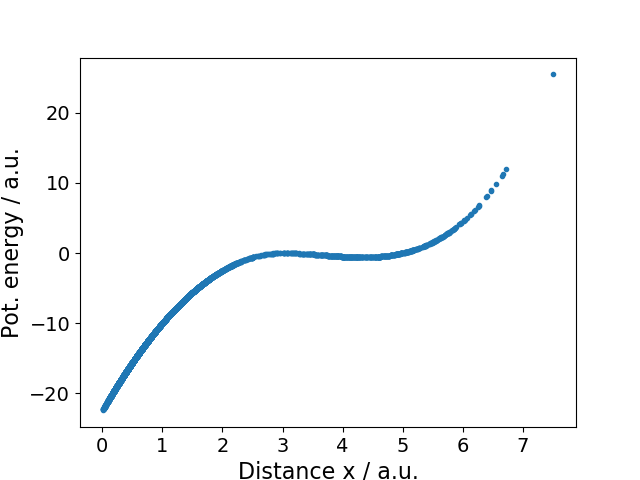

In [3]:
from IPython.display import Image, display_png
display_png(Image("folding_energy.png"))

In [4]:
import numpy as np
traj=np.load("sample_br2d/dataset/folding_2d_traj.npy")
print(traj.shape)
print(traj)

(1000, 1000, 2)
[[[-0.45215468  0.248033  ]
  [ 0.87583337 -0.35884691]
  [-0.33779758  0.77778723]
  ...
  [-0.46391083  1.05273905]
  [ 0.8538971   0.27376298]
  [ 0.23040763  0.15554435]]

 [[-0.93720165 -0.25323868]
  [-0.43206903 -0.50053663]
  [ 0.3267098   0.26789032]
  ...
  [ 0.06009309 -0.27532707]
  [ 0.47186127  0.91593161]
  [ 0.39833053  0.4888813 ]]

 [[-0.38128006  0.63720199]
  [ 0.45563312 -0.0674532 ]
  [-1.16434148  0.22052602]
  ...
  [-1.771225    0.62467123]
  [-1.13629967  0.01155772]
  [-0.14946466 -0.27395123]]

 ...

 [[ 1.35906528  0.97552549]
  [ 1.0793157   1.24160545]
  [ 0.50756688  0.87931947]
  ...
  [-0.34333816 -0.42183736]
  [-0.0145508   0.92392505]
  [-0.16888253 -0.28989471]]

 [[ 1.47819125  0.50636202]
  [ 1.24512629  0.85697579]
  [ 0.82907096 -0.49514934]
  ...
  [ 1.00181788 -0.06629742]
  [-0.6768746  -0.46384667]
  [ 0.86729013 -0.57120471]]

 [[ 0.52881854 -0.23123228]
  [-0.70336819 -0.11314213]
  [ 0.24475845 -0.22942844]
  ...
  [-0.36

In [5]:
!cat ./sample_br2d/config_br2d.json

In [6]:
!cat ./sample_br2d/hyparam_br2d.json

{
    "emission_internal_layers": [
        {
            "name": "fc",
            "dim_output": 32
        }
    ],
	"transition_internal_layers": [
        {
            "name": "fc"
        }
    ],
    "variational_internal_layers": [
        {
            "name": "lstm"
        },
        {
            "name": "fc"
        }
    ],
    "potential_internal_layers": [
        {
            "name": "fc"
        }
    ],
    "evaluation": {
        "all_costs": [
            0.0,
            0.0,
            0.0
        ],
        "cost": 0.0,
        "error": 0.0,
        "validation_all_costs": [
            0.0,
            0.0,
            0.0
        ],
        "validation_cost": 0.0
    },
    "evaluation_output": "sample_br2d/model/hyparam.result.json",
    "plot_path": "sample_br2d/model/plot",
    "save_model_path": "sample_br2d/model/model",
    "save_result_filter": "sample_br2d/model/result/filter.jbl",
    "save_result_test": "sample_br2d/model/result/test.jbl",
    "sav

In [7]:
!mkdir -p sample_br2d/model


In [8]:
!DMM --config sample_br2d/config_br2d.json\
--hyperparam sample_br2d/hyparam_br2d.json train


2020-03-14 13:51:09.092578: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2020-03-14 13:51:09.092814: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.
#training data: 800
#valid data: 200
train_data_size: 800
batch_size     : 100
n_steps        : 1000
dim_emit       : 2


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed t

epoch 130, training cost 45.3558 (error=0.0107124), validation cost 45.2639 (error=0.0106915)
epoch 140, training cost 45.3425 (error=0.0107098), validation cost 45.2419 (error=0.0106865)
epoch 150, training cost 45.3454 (error=0.0107091), validation cost 45.249 (error=0.0106795)
epoch 160, training cost 45.3379 (error=0.0107088), validation cost 45.2457 (error=0.0106799)
epoch 170, training cost 45.3295 (error=0.0107077), validation cost 45.2448 (error=0.0106785)
epoch 180, training cost 45.3285 (error=0.0107114), validation cost 45.2492 (error=0.0106853)
epoch 190, training cost 45.3339 (error=0.0107105), validation cost 45.2446 (error=0.0106827)
epoch 200, training cost 45.3277 (error=0.010712), validation cost 45.2347 (error=0.0106883)
epoch 210, training cost 45.3243 (error=0.0107079), validation cost 45.2361 (error=0.0106825)
epoch 220, training cost 45.3266 (error=0.0107117), validation cost 45.2398 (error=0.0106856)
epoch 230, training cost 45.328 (error=0.0107111), validation 